'mean: 17:17:08'

'min: 16:54:32'

'max: 17:54:42'

'sum: 5 days, 18:17:01'

'median: 17:14:02'

'range: 1:00:10'

'range-hh: 2:22:50'

'hh-co: 19:39:58'

'%hh: 0.12105417110495065'

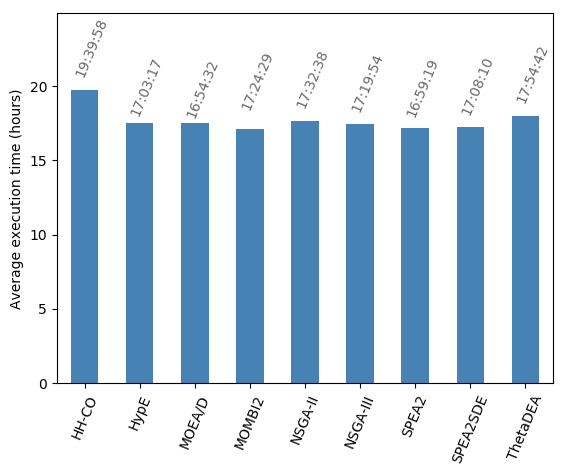

In [170]:
import pandas as pd
import math
import matplotlib
matplotlib.use
import matplotlib.pyplot as plt
plt.style.use('default')
import datetime



algorithms=["HypE", "MOEAD", "MOMBI2", "NSGAII", "NSGAIII", "SPEA2", "SPEA2SDE", "ThetaDEA", "CHHCO"]
# algorithms=["ThetaDEA", "NSGAII"]

dflist = []
for alg in algorithms:
    base='../experiment/pc5/ECSymposium2019CompetitionMethodology/5/data/%s/WindTurbineDesign/TIME'%(alg)
    alglist = []
    for i in range(21):
        df = pd.read_csv("%s%s.tsv"%(base, i), header=None)
        df.columns = [alg]
        df[alg] = df[alg] / 3.6e+6 # milliseconds to hours
        alglist.append(df)
    dfalg = pd.concat(alglist)
    dfalg.reset_index(drop=True, inplace=True)
    dflist.append(dfalg)
df = pd.concat(dflist, axis=1)
# set order
df = df[["CHHCO","HypE","MOEAD","MOMBI2","NSGAII","NSGAIII","SPEA2","SPEA2SDE","ThetaDEA"]]
# display(df)

ax = df.max().plot.bar(color="steelblue")
ax.set_ylim(0, 24.9)

values = [19.666123,17.054781,16.908951,17.407990,17.543936,17.331762,16.988623,17.135988,17.911621]
i = 0
while i < len(values):
    ax.text(i-.2, values[i]+4.3, str(datetime.timedelta(seconds=round(values[i]*60*60))), color='dimgray', rotation=67.5)
    i += 1

ax.set_ylabel("Average execution time (hours)")
labels=["HH-CO","HypE","MOEA/D","MOMBI2","NSGA-II","NSGA-III","SPEA2","SPEA2SDE","ThetaDEA"]
ax.set_xticklabels(labels, rotation=67.5)

# # ax2.legend()#bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right', ncol=2)
fig = ax.get_figure()
# plt.subplots_adjust(left=0)
fig.savefig("executiontime.pdf", bbox_inches='tight')
# plt.show()

df = df.mean()
# df.sort_values(inplace=True, ascending=True)
dfhh = df.iloc[df.index == 'CHHCO']
df = df.iloc[df.index != 'CHHCO']
display("mean: %s"%str(datetime.timedelta(seconds=round(df.mean()*60*60))))
display("min: %s"%str(datetime.timedelta(seconds=round(df.min()*60*60))))
display("max: %s"%str(datetime.timedelta(seconds=round(df.max()*60*60))))
display("sum: %s"%str(datetime.timedelta(seconds=round(df.sum()*60*60))))
display("median: %s"%str(datetime.timedelta(seconds=round(df.median()*60*60))))
display("range: %s"%str(datetime.timedelta(seconds=round((df.max()-df.min())*60*60))))
display("range-hh: %s"%str(datetime.timedelta(seconds=round((dfhh.mean()-df.mean())*60*60))))
display("hh-co: %s"%str(datetime.timedelta(seconds=round(dfhh.mean()*60*60))))
display("%%hh: %s"%str(1-(df.mean()/dfhh.mean())))

